In [58]:
import glob
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
n_0 = 50
jump = 1

root_dir = f"LPA/Simulation/Jump_{jump}_N0_{n_0}"

In [72]:
all_files = glob.glob(os.path.join(root_dir, "LSTM_*_run*.csv"))

dfs = []
for file in all_files:
    # Read only the column you care about
    df = pd.read_csv(file, usecols=["windows_1"])
    
    # Rename the column to something unique (e.g., filename without extension)
    name = os.path.splitext(os.path.basename(file))[0]
    df = df.rename(columns={"windows_1": f"windows_1_{name}"})
    
    dfs.append(df)

df = pd.concat(dfs, axis=1)
df["windows_1_mean"] = df.mean(axis=1)

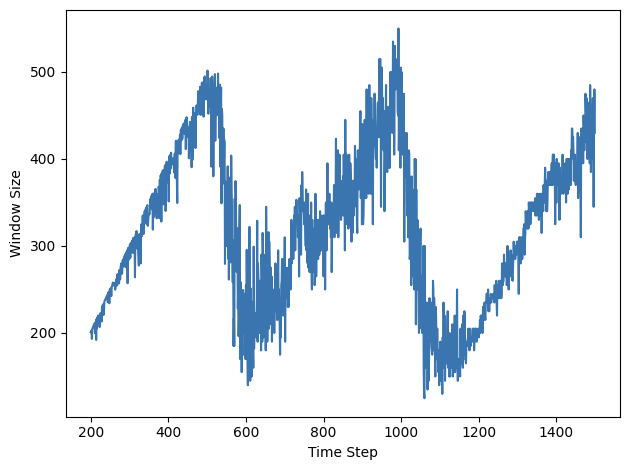

In [77]:
plt.plot(jump*np.arange(len(df['windows_1_mean']))[200:], df['windows_1_mean'][200:], color='#3B75AF')

plt.xlabel('Time Step')
plt.ylabel('Window Size')
plt.tight_layout()
plt.savefig(f"{root_dir}/window_size.png", format='png', dpi=600, transparent=True)
plt.show()

In [76]:
save = pd.DataFrame()
save.index = df.index
save['windows'] = df['windows_1_mean'].apply(int)
save.to_csv(f"{root_dir}/window_size.csv")